# Training A Food Classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Load And Prepare Data

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [2]:
import os
import shutil

In [3]:
# Getting The Current File Location
print(os.getcwd())

/content


In [4]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir('./drive')

In [6]:
os.chdir('./MyDrive')

In [7]:
# Changing Directory To The Required One
os.chdir('./RiceDiseaseDataset')

In [8]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1d3h1F848yg3tMSfy8HjwhJbvyDR_h60Q/RiceDiseaseDataset'

In [13]:
TrainDir = '/content/drive/.shortcut-targets-by-id/1d3h1F848yg3tMSfy8HjwhJbvyDR_h60Q/RiceDiseaseDataset'
os.chdir(TrainDir)

In [14]:
os.listdir()

['LeafBlast', 'Hispa', 'Healthy', 'BrownSpot', 'AllImages', 'my_cnn_model.pth']

# Universal Approximation

## Checking Image

In [16]:
# Dividing The Rice Into Four Different Parts
Label1 = 'BrownSpot'
Label2 = 'Healthy'
Label3 = 'Hispa'
Label4 = 'LeafBlast'

# Preperation Some Data
##Next gonna do preperation to make the data handling easier. It's not important that you understand the following code snippet completly.
##W e're just doing two things:
### 1.labelA Removing all images that don't have or labelB
### 2.Renaming images with labelA or labelB to have that label in their filename

In [17]:
# Loop Thorugh All Images Downlaoded
print(os.listdir())

['LeafBlast', 'Hispa', 'Healthy', 'BrownSpot', 'AllImages', 'my_cnn_model.pth']


In [18]:
# Renaming For Proper Use
# TrainDir = '/content/drive/.shortcut-targets-by-id/1LDUkliPUtK1oQOKMnjb5XpEsgeLQ0OF5/RiceDiseaseDataset/train'
# os.chdir(TrainDir)

# for folderPath in os.listdir():
#     os.chdir(f'{TrainDir}/{folderPath}')
#     for img in os.listdir():
#         CurrentName = os.path.join(os.getcwd(),img)
#         NewName = os.path.join(os.getcwd(),f'{folderPath}_{img}')
#         os.rename(CurrentName,NewName)
#     os.chdir(TrainDir)

In [24]:
# Moving All Files To A Single Folder
os.makedirs('AllImages',exist_ok=True)
AllImagesDir = '/content/drive/.shortcut-targets-by-id/1d3h1F848yg3tMSfy8HjwhJbvyDR_h60Q/RiceDiseaseDataset/AllImages'

In [20]:
# TrainDir = '/content/drive/.shortcut-targets-by-id/1LDUkliPUtK1oQOKMnjb5XpEsgeLQ0OF5/RiceDiseaseDataset/train'
# os.chdir(TrainDir)

# for folderPath in os.listdir():
#     os.chdir(f'{TrainDir}/{folderPath}')
#     for img in os.listdir():
#         CurrentPath = os.path.join(os.getcwd(),img)
#         NewPath = os.path.join(f'{TrainDir}/AllImages',img)
#         shutil.copy(CurrentPath,NewPath)
#     os.chdir(TrainDir)

## Training Model

In [21]:
def GetLabel(fileName):
  return fileName.split('_')[0]

In [22]:
GetLabel("ABC_123")

'ABC'

In [25]:
dls = ImageDataLoaders.from_name_func(
  AllImagesDir, get_image_files(AllImagesDir), valid_pct=0.2, seed=420,
  label_func=GetLabel, item_tfms=Resize(224))

#PCT --> For Validation

In [26]:
dls

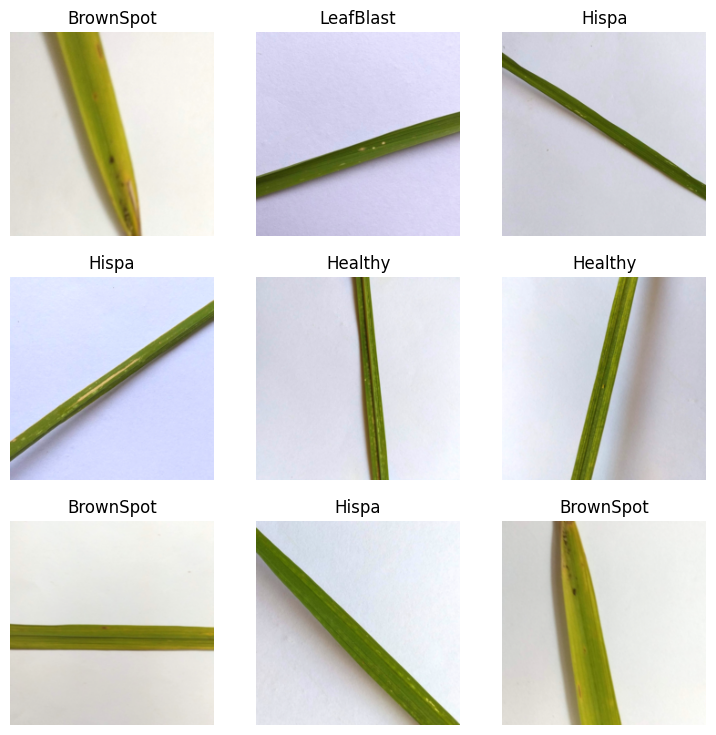

In [28]:
dls.valid.show_batch()

In [29]:
learn = cnn_learner (dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=15)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,1.906646,1.364352,0.456250,05:52


epoch,train_loss,valid_loss,error_rate,time
0,1.256909,1.141620,0.437500,02:56
1,0.988125,1.063670,0.400000,03:01
2,0.800393,1.226305,0.378125,02:51
3,0.639734,1.210584,0.365625,02:56
4,0.518523,1.336763,0.346875,02:53
5,0.399986,1.284271,0.350000,02:57
6,0.301363,1.420961,0.368750,02:56
7,0.222952,1.417372,0.325000,02:55
8,0.169158,1.494683,0.350000,02:56
9,0.123740,1.503154,0.325000,02:59


# Verify Model

## Upload An Image

In [30]:
# from google.colab import files
# Uploader = files.upload()

# for img in Uploader.items():
#   uploadedImg = img[0]

img = PILImage.create('/content/pest.png')
img.show()

label,_,probs = learn.predict(img)
print (f"This is a {label}")


FileNotFoundError: ignored

In [31]:
print (f"{Label1}{probs[0].item():.6f}")
print (f"{Label2}{probs[1].item():.6f}")
print (f"{Label3}{probs[2].item():.6f}")

NameError: ignored

In [32]:
 # with open("C:\\Users\\Niv Doshi\\Desktop\\Pest.png",'r',errors='ignore') as img:
#     image = img.read()

#     image = PILImage.create('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')
#     image = Resize(224)(image)  # Resize the image to 224x224 pixels
#     image = ToTensor()(image)    # Convert the image to a PyTorch tensor
#     image = image.unsqueeze(0)
#     label,_,probs = learn.predict(image)
#     print (f"This is a {label}")

In [33]:
# from PIL import Image
# from IPython.display import display
# import torchvision.transforms as transforms
# import torch

# image = Image.open('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')

# transform = transforms.Compose([
#     transforms.Resize((224,244)),
#     transforms.ToTensor()
# ])

# image = transform(image)

# label,_,probs = learn.predict(image)
# print (f"This is a {label}")

In [43]:
#ToSave
learn.save('/content/my_cnn_model')

Path('/content/my_cnn_model.pth')

In [36]:
learn2 = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn2 = learn.load('/content/drive/MyDrive/RiceDiseaseDataset/my_cnn_model')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [41]:
# Download a file
from google.colab import files

# Download the file to the local file system
files.download('/content/drive/MyDrive/RiceDiseaseDataset/my_cnn_model')

FileNotFoundError: ignored

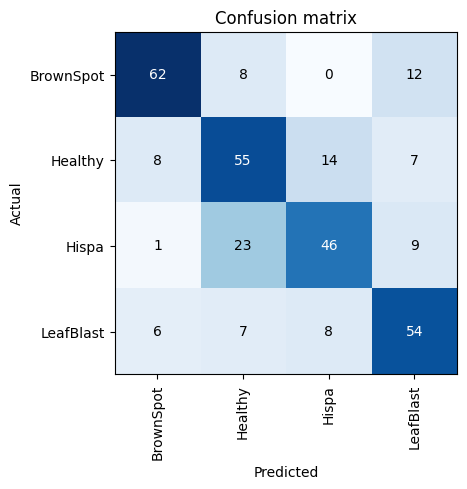

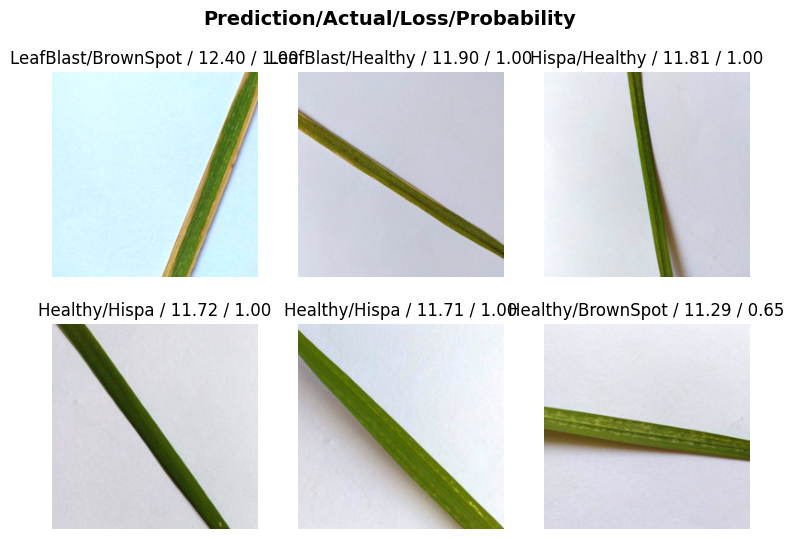

In [37]:
interp=ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()
interp.plot_top_losses (6)

In [ ]:
# image = PILImage.create('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')
# image = Resize((224,224))(image)  # Resize the image to 224x224 pixels
# image = ToTensor()(image)    # Convert the image to a PyTorch tensor
# image = image.unsqueeze(0)
# len(image)